In [12]:
import torch
import sys
import torch
import os.path as osp
import tqdm
import sys
import numpy as np
sys.path.append('/afs/cern.ch/work/m/mgarciam/private/mlpf/')
from src.dataset.dataset import SimpleIterDataset
from src.utils.utils import to_filelist
from torch.utils.data import DataLoader
import dgl


In [13]:
class Args:
    def __init__(self):
        self.data_train = ['/eos/experiment/fcc/ee/simulation/ClicDet/mlpf_trees_v1/pf_tree_1.root']
        self.data_val = ['/eos/experiment/fcc/ee/simulation/ClicDet/mlpf_trees_v1/pf_tree_1.root']
        #self.data_train = files_train
        self.data_config = '/afs/cern.ch/work/m/mgarciam/private/mlpf/config_files/config_2_newlinks.yaml'
        self.extra_selection = None
        self.train_val_split = 0.8
        self.data_fraction = 1
        self.file_fraction = 1
        self.fetch_by_files = False
        self.fetch_step = 0.01
        self.steps_per_epoch = None
        self.in_memory = False
        self.local_rank = None
        self.copy_inputs = False
        self.no_remake_weights = False
        self.batch_size = 10
        self.num_workers = 0
        self.demo = False
        self.laplace = False
        self.diffs = False
        self.class_edges = False
args = Args()
train_range = (0, args.train_val_split)
train_file_dict, train_files = to_filelist(args, 'train')

In [14]:
train_data = SimpleIterDataset(train_file_dict, args.data_config, for_training=True,
                                   extra_selection=args.extra_selection,
                                   remake_weights= True,
                                   load_range_and_fraction=(train_range, args.data_fraction),
                                   file_fraction=args.file_fraction,
                                   fetch_by_files=args.fetch_by_files,
                                   fetch_step=args.fetch_step,
                                   infinity_mode= False,
                                   in_memory=args.in_memory,
                                   async_load = False,
                                   name='train')

In [15]:
iterator = iter(train_data)

=== Restarting DataIter train, seed=None ===


In [27]:
# gets examples of the dataset, g is a dgl graph and gt is a tensor with the information for the particles 
g,gt = next(iterator)

In [28]:
hit_type = g.ndata['hit_type']
e = g.ndata['e_hits']
pos = g.ndata['pos_hits_norm']
hit_type_a = torch.argmax(hit_type,dim=1)
particle_id = g.ndata['particle_number']
pos_particles = gt[:,0:3]
e_particle = gt[:,3]
[torch.sum(e[particle_id == i]) for i in np.unique(particle_id)]

[tensor(0.7949),
 tensor(20.1218),
 tensor(20.2646),
 tensor(4.5150),
 tensor(1.8166)]

# plotting ideas:
* that the plots are interactive (plotly)
* the dots are the size of the energy (tracks no energy)
* plot particles 
* plot direction of the track (functions line 105 there are the different outputs )

In [36]:
e[hit_type_a==0]

tensor([[0.],
        [0.]])

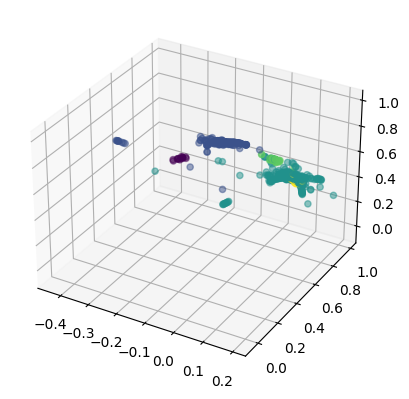

In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos[:,0], pos[:,1], pos[:,2],marker='o', c = particle_id, alpha=0.5)

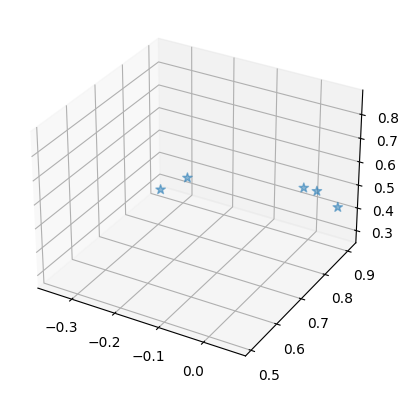

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pos_particles[:,0], pos_particles[:,1], pos_particles[:,2],marker='*',s= 50, alpha=0.5)